In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

from random import randint

# Simulation of critical systems

## Variable declaration

In [15]:
SPAN_OF_GRID = 10
MAX_ITEMS_PER_CELL = 4

NUM_ITERATIONS = 1000
SECONDS_PER_ITERATION = 0.1
INCREMENTATION_VALUE = 1

TRANSFORMS = [(1,0),
              (-1,0),
              (0,1),
              (0,-1)]


## Allocation of the space

In [16]:
GRID_OF_VALUES = np.zeros((SPAN_OF_GRID, SPAN_OF_GRID))
FIGSIZE = (20, 5)

## Random incrementation

In [17]:
def increment_a_value_in_grid(grid_of_values: np.ndarray = GRID_OF_VALUES, 
                              incremetation_value: int = INCREMENTATION_VALUE):
    
    # pick a random spot on the grid
    width = grid_of_values.shape[0]
    height = grid_of_values.shape[1]
    
    # increment by incrementation value
    x_val = randint(0, width-1)
    y_val = randint(0, height-1)
    grid_of_values[x_val, y_val] += 1
    
    return grid_of_values

## Display simulation

In [18]:
%matplotlib notebook

def display_outcome(grid_of_values: np.ndarray = GRID_OF_VALUES):
    plt.imshow(grid_of_values)
    plt.colorbar()
    plt.clim(0, MAX_ITEMS_PER_CELL)
    plt.xlabel('x point')
    plt.ylabel('y point')
    plt.title('iteration {}'.format(iteration))

    matplotlib.rcParams.update({'font.size': 30})

    fig.canvas.draw()
    time.sleep(SECONDS_PER_ITERATION)
    plt.gcf().clear()

## Play through simulation

In [19]:
def play_through_simulation(grid_of_values: np.ndarray = GRID_OF_VALUES, 
                            max_items_per_cell: int = MAX_ITEMS_PER_CELL):
    
    points_where_above = np.argwhere(grid_of_values >= max_items_per_cell)
    
    for (x, y) in points_where_above:
        grid_of_values[x, y] = 0
        for (dx, dy) in TRANSFORMS:
            try:
                grid_of_values[x + dx, y + dy] = grid_of_values[x + dx, y + dy] + 1
            except:
                continue
                
    display_outcome()

## Simulation and visualization

<IPython.core.display.Javascript object>


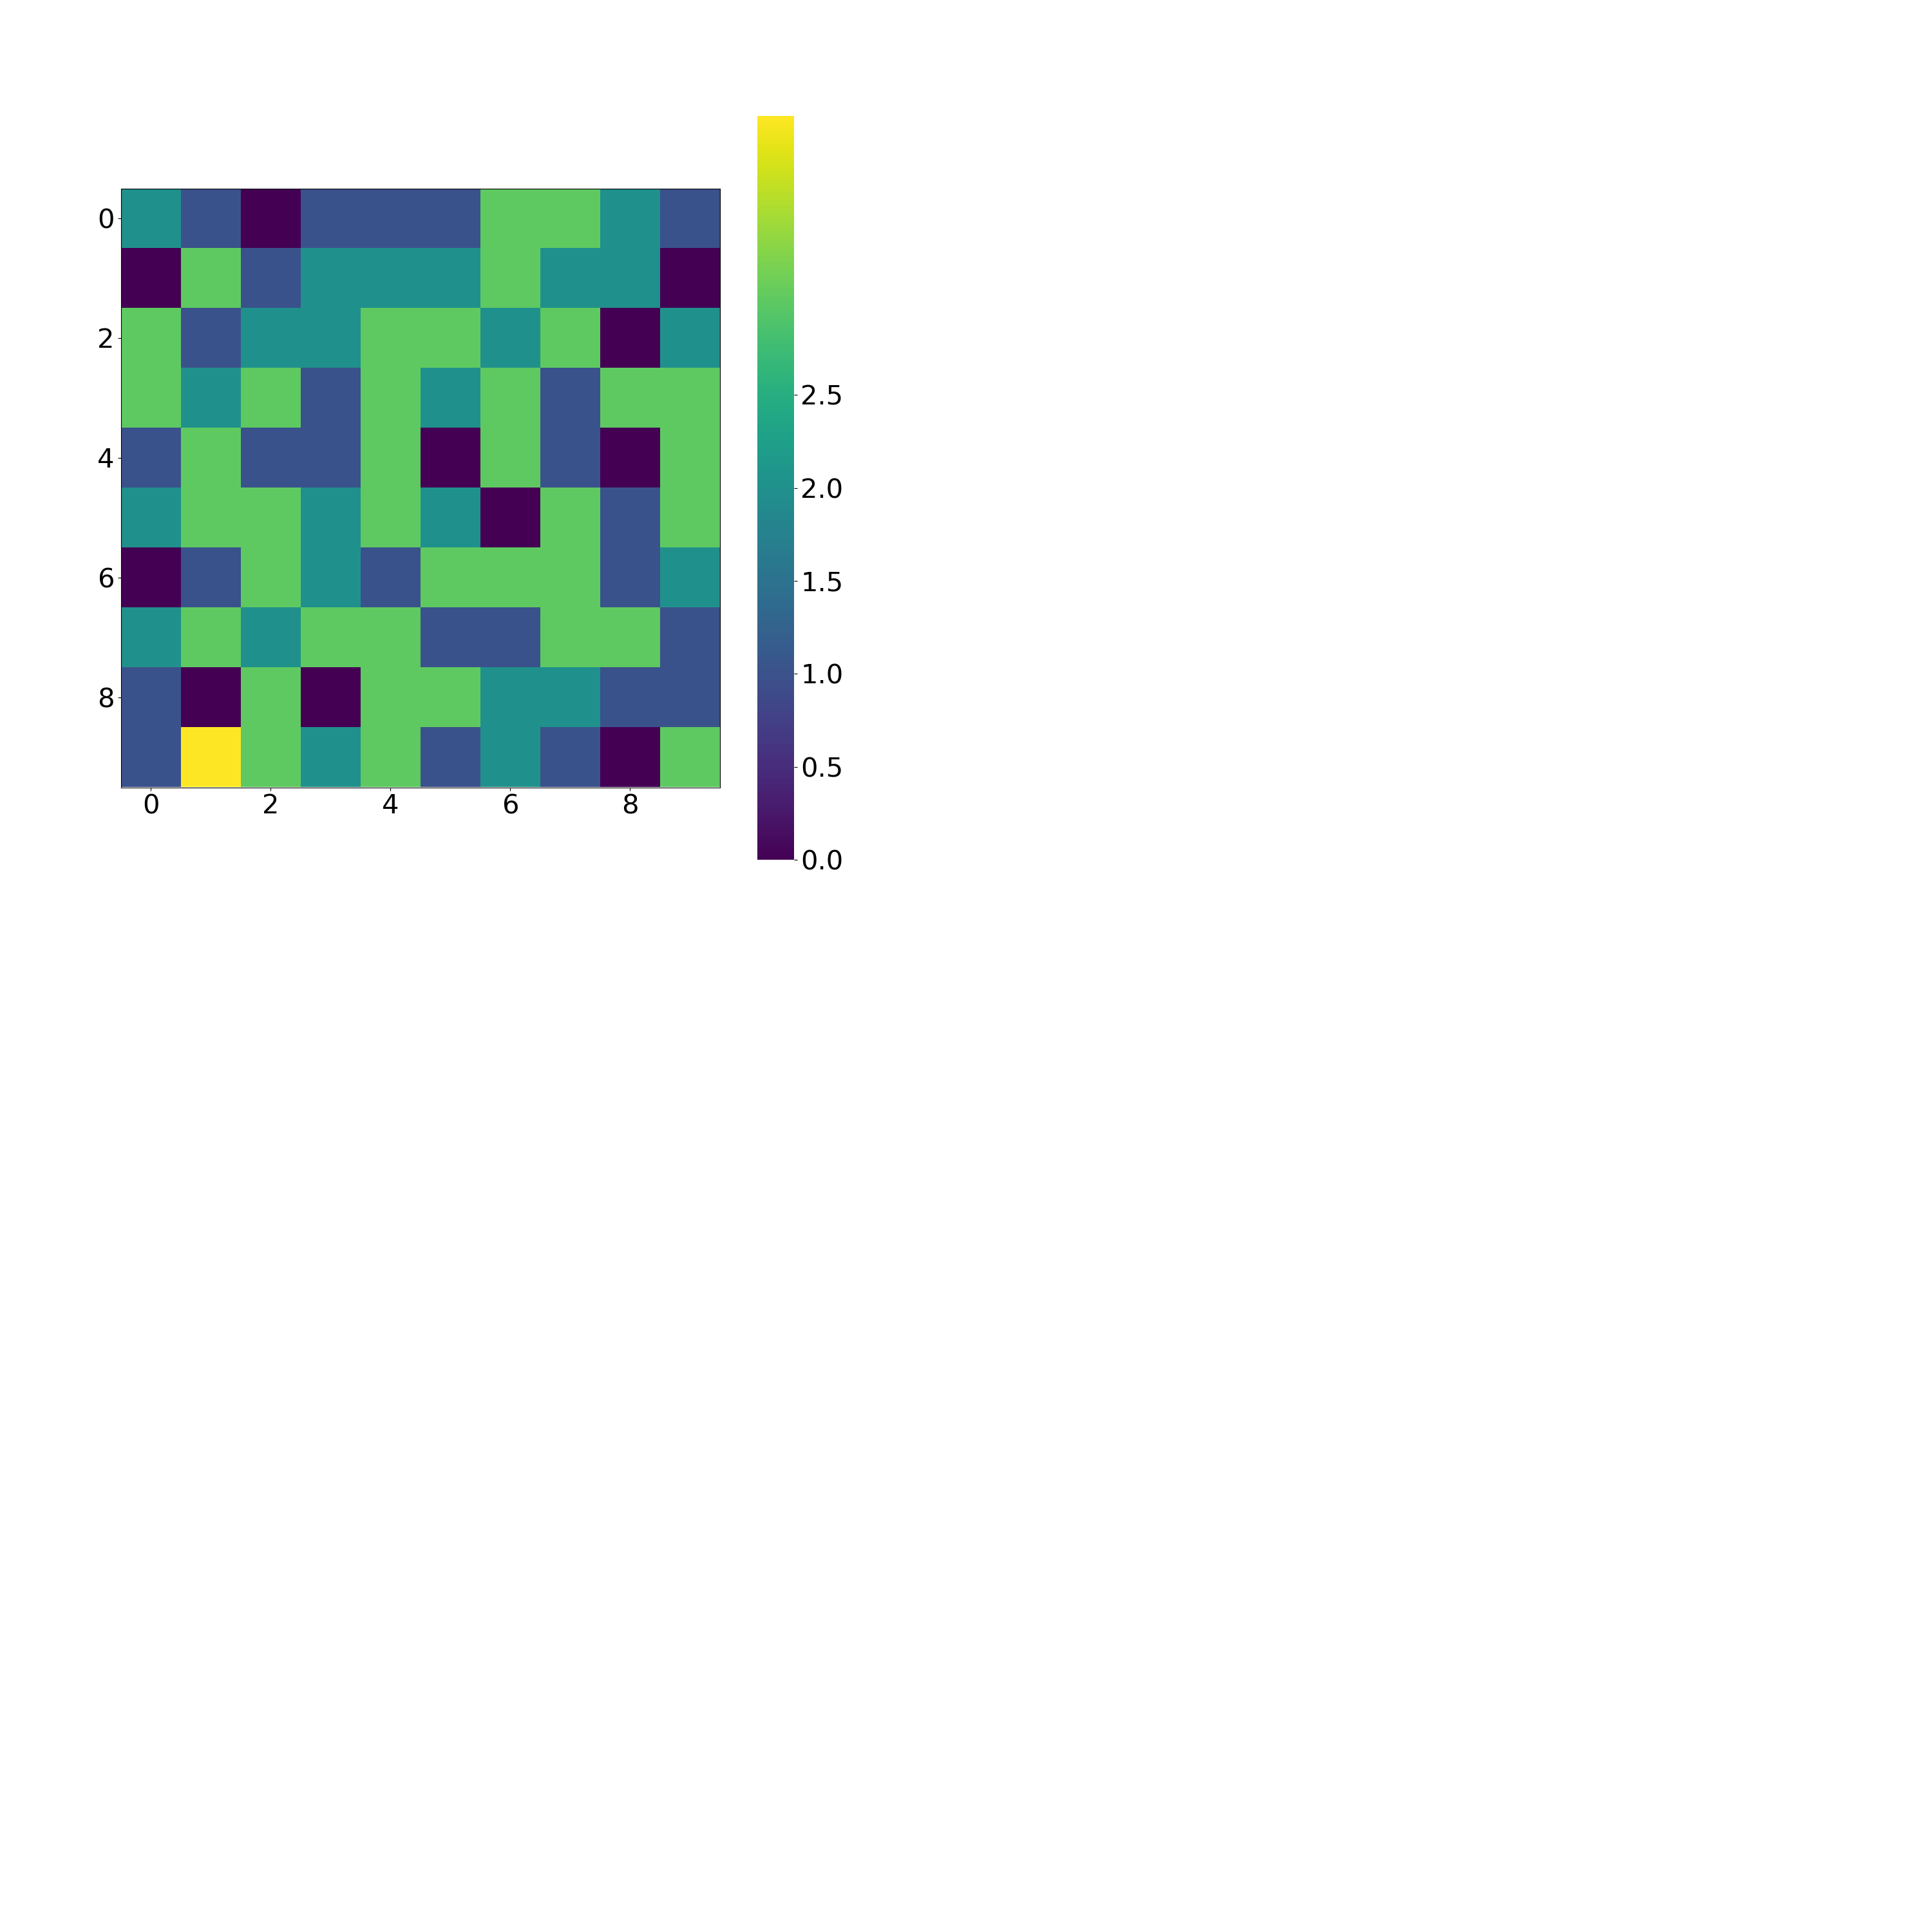

KeyboardInterrupt: 

In [20]:
fig, ax = plt.subplots(figsize=(15,15))

for iteration in range(0, NUM_ITERATIONS):
    increment_a_value_in_grid()
    
    play_through_simulation()
    
    while (grid_of_values >= max_items_per_cell).any():
            play_through_simulation()


##### 